In [67]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("dark")
import pandas as pd
import glob


### Loading Dataset

In [8]:
file_list = []
for file in glob.glob("dataset\\*.csv"):
    print(file)
    file_list.append(file)
    # df = pd.read_csv(file)

dataset\IRX6XAFF0005.csv
dataset\IRX6XALS0002.csv
dataset\IRX6XS300003.csv
dataset\IRX6XSLC0000.csv
dataset\IRX6XSNT0009.csv
dataset\IRX6XTAL0001.csv
dataset\IRX6XTDP0004.csv
dataset\IRX6XTPI0009.csv
dataset\IRX6XTPI0009[2022-05-23-10-18-57].csv
dataset\IRX6XTPI0025.csv
dataset\IRX6XWAI0001.csv
dataset\IRX6XWTH0001.csv
dataset\IRXWXEXR0007.csv
dataset\IRXWXEXR0023.csv
dataset\IRXWXOCI0001.csv
dataset\IRXWXOCI0027.csv
dataset\IRXYXTPI0009.csv
dataset\IRXYXTPI0025.csv
dataset\IRXZXAGR0009.csv
dataset\IRXZXBNK0006.csv
dataset\IRXZXCMI0000.csv
dataset\IRXZXCML0005.csv
dataset\IRXZXCNS0007.csv
dataset\IRXZXENG0009.csv
dataset\IRXZXEXR0004.csv
dataset\IRXZXEXR0020.csv
dataset\IRXZXFIN0006.csv
dataset\IRXZXFOD0000.csv
dataset\IRXZXHTL0003.csv
dataset\IRXZXIND0008.csv
dataset\IRXZXINS0001.csv
dataset\IRXZXINV0006.csv
dataset\IRXZXITG0009.csv
dataset\IRXZXLSG0005.csv
dataset\IRXZXMIN0007.csv
dataset\IRXZXMML0003.csv
dataset\IRXZXMNF0000.csv
dataset\IRXZXMOT0003.csv
dataset\IRXZXMTL0006.csv
data

In [41]:
df = pd.read_csv("dataset/IRX6XTPI0009.csv", encoding='utf-16')
df.drop(columns=["<TICKER>", "<COl12>", "<COl13>", "<LAST>"], inplace=True)
df["<DTYYYYMMDD>"] = pd.to_datetime(df["<DTYYYYMMDD>"], format="%Y%m%d")
df.rename(columns={"<DTYYYYMMDD>": "Date"}, inplace=True)
df.head()

,Date,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>,<OPENINT>.1,<OPENINT>.2
0,2008-12-06,9248.8,9248.8,9178.3,9178.3,8539624,1.855769e+10,1095,0.0
1,2008-12-07,9178.3,9178.3,9130.5,9130.5,11752353,2.051911e+10,1666,9178.3
2,2008-12-08,9102.7,9103.4,9089.2,9089.2,15299115,6.007124e+10,1873,9130.5
3,2008-12-10,9071.6,9071.6,9023.7,9023.7,15689653,3.258769e+10,1737,9089.2
4,2008-12-13,8973.3,8973.0,8973.3,8973.3,31428174,6.562290e+10,3108,9023.7


In [42]:
# Filter to last years data
df = df[df["Date"] >= "2021-05-23"]
df.reset_index(inplace=True, drop=True)
df.head()

,Date,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>,<OPENINT>.1,<OPENINT>.2
0,2021-05-23,1123500.0,1123500.0,1107900.3,1107900.3,2736872962,1.429308e+13,195077,4.429764e+10
1,2021-05-24,1105220.0,1105220.0,1095726.2,1095726.2,3100360796,1.610564e+13,252943,4.379279e+10
2,2021-05-25,1095800.0,1105850.0,1105446.0,1105446.0,3828842175,2.090582e+13,349959,4.413669e+10
3,2021-05-26,1106380.0,1110560.0,1109369.6,1109369.6,3187572389,1.646125e+13,389162,4.429966e+10
4,2021-05-29,1111520.0,1139620.0,1139480.9,1139480.9,5193610223,2.851750e+13,395488,4.558550e+10


<AxesSubplot:xlabel='Date'>

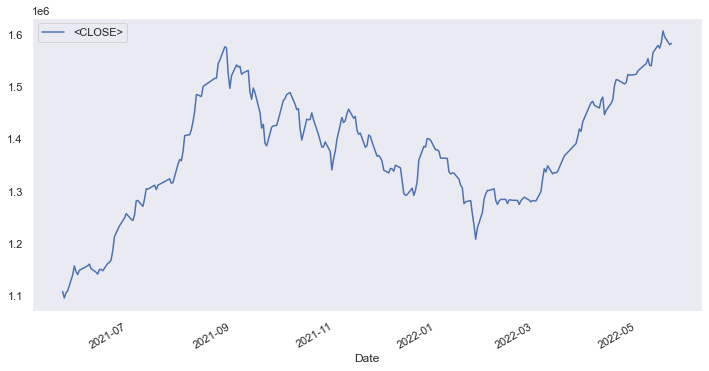

In [51]:
df.plot(x="Date", y="<CLOSE>", figsize=(12, 6))

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         238 non-null    datetime64[ns]
 1   <OPEN>       238 non-null    float64       
 2   <HIGH>       238 non-null    float64       
 3   <LOW>        238 non-null    float64       
 4   <CLOSE>      238 non-null    float64       
 5   <VOL>        238 non-null    int64         
 6   <OPENINT>    238 non-null    float64       
 7   <OPENINT>.1  238 non-null    int64         
 8   <OPENINT>.2  238 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 16.9 KB


In [45]:
data = df["<CLOSE>"].to_numpy()

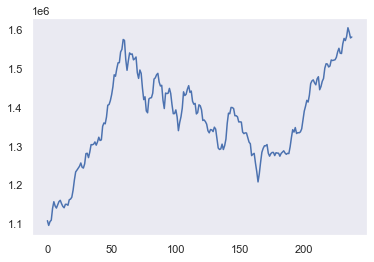

In [48]:
plt.plot(data)

### Preprocessing

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))


In [143]:
train_size = len(data)*0.55
train_data, test_data = data[0:int(train_size)], data[int(train_size):]
len(train_data), len(test_data)

(130, 108)

### Create Dataset

In [144]:
def create_dataset(dataset, time_steps=1):
    data_x, data_y = [], []
    for i in range(len(dataset)-time_steps-1):
        data_x.append(dataset[i:(i+time_steps)])
        data_y.append(dataset[i+time_steps])
    return np.array(data_x), np.array(data_y)

In [145]:
time_steps = 50
x_train, y_train = create_dataset(train_data, time_steps)
x_test, y_test = create_dataset(test_data, time_steps)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Note: LSTM requires input shape to be (sample, timesteps, feature_size) in this case: (155, 10, 1)


x_train shape: (79, 50, 1)
y_train shape: (79, 1)
x_test shape: (57, 50, 1)
y_test shape: (57, 1)


### LSTM Model Creation

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=25, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(units=25, return_sequences=False))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
model.add(Dense(units=1), )
model.compile(optimizer="adam", loss="mean_squared_error")

In [147]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50, 25)            2700      
                                                                 
 lstm_10 (LSTM)              (None, 25)                5100      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 7,826
Trainable params: 7,826
Non-trainable params: 0
_________________________________________________________________


### LSTM Model Train

In [148]:
# Tensorsboard callback
import datetime

In [149]:
model.fit(
    x_train,
    y_train, 
    epochs=100, 
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))]
    )

Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.4136 - val_loss: 0.3415
Epoch 2/100
2/2 [==============================] - 0s 186ms/step - loss: 0.3133 - val_loss: 0.2527
Epoch 3/100
2/2 [==============================] - 0s 188ms/step - loss: 0.2210 - val_loss: 0.1696
Epoch 4/100
2/2 [==============================] - 0s 158ms/step - loss: 0.1370 - val_loss: 0.0951
Epoch 5/100
2/2 [==============================] - 0s 120ms/step - loss: 0.0676 - val_loss: 0.0375
Epoch 6/100
2/2 [==============================] - 0s 114ms/step - loss: 0.0238 - val_loss: 0.0106
Epoch 7/100
2/2 [==============================] - 0s 116ms/step - loss: 0.0196 - val_loss: 0.0155
Epoch 8/100
2/2 [==============================] - 0s 114ms/step - loss: 0.0422 - val_loss: 0.0195
Epoch 9/100
2/2 [==============================] - 0s 113ms/step - loss: 0.0459 - val_loss: 0.0139
Epoch 10/100
2/2 [==============================] - 0s 124ms/step - loss: 0.0322 - val_loss: 0.0102
Epoch 11/100

In [150]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 13ms/step - loss: 0.0117


0.011701949872076511

### Prediction

In [151]:
model.predict(x_test)[2]

array([0.5022202], dtype=float32)

In [152]:
model.predict(x_test[2].reshape(1, -1, 1))

array([[0.50222015]], dtype=float32)

In [153]:
y_test[2]

array([0.36418223])

### Tensorboard

In [154]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [155]:
%tensorboard --logdir=logs/

Reusing TensorBoard on port 6006 (pid 12916), started 0:45:36 ago. (Use '!kill 12916' to kill it.)

In [156]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [157]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [158]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.06600224764156648

In [159]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.10817555171686029

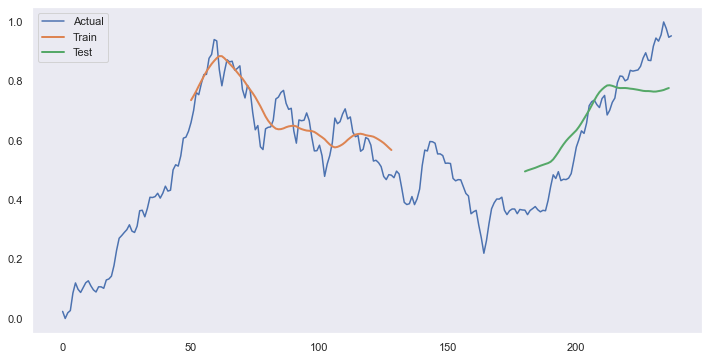

In [161]:
### Plotting 
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot, linewidth=2)
plt.plot(testPredictPlot, linewidth=2)
plt.legend(['Actual', 'Train', 'Test'], loc='upper left')
plt.show()